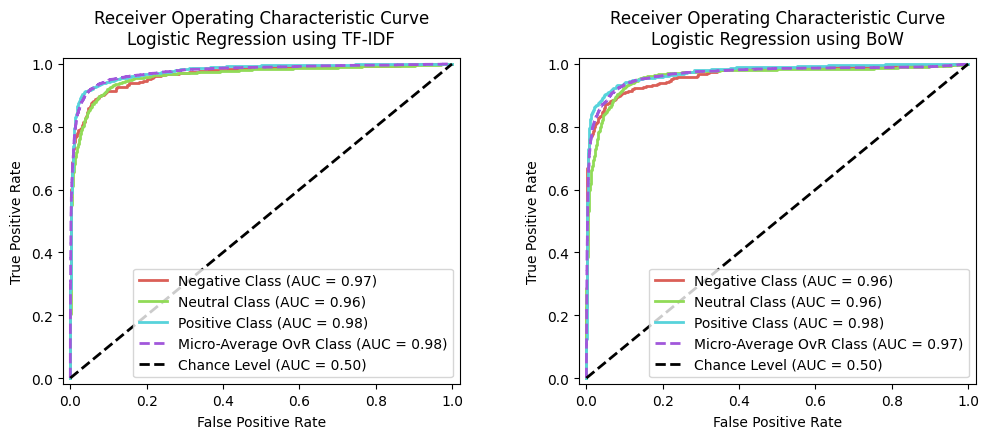

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import seaborn as sns

# Load ROC data from CSV
roc_data_tfidf = pd.read_csv('1_Logistic_Regression/roc_data/1/roc_data_tfidf.csv')
roc_data_bow = pd.read_csv('1_Logistic_Regression/roc_data/1/roc_data_bow.csv')

# Setup subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# Define a function to plot ROC curves
def plot_roc_curves(ax, data, title):
    # Find unique classes excluding 'micro'
    classes = data['Class'].unique()
    colors = sns.color_palette('hls', len(classes))  # Colors for different classes
    # colors = ['darkorange', 'green', 'blue', 'purple']  # Colors for different classes
    for i, cls in enumerate(sorted(classes)):
        cls_updated = {"-1": 'Negative', "0": 'Neutral', "1": 'Positive', 'micro': 'Micro-Average OvR'}
        class_data = data[data['Class'] == cls]
        fpr, tpr = class_data['FPR'], class_data['TPR']
        roc_auc = auc(fpr, tpr)
        if cls == "micro":
            ax.plot(fpr, tpr, alpha=1, linestyle='--', color=colors[i % len(colors)], lw=2, label=f'{cls_updated[cls]} Class (AUC = {roc_auc:.2f})')
        else:
            ax.plot(fpr, tpr, alpha=1, color=colors[i % len(colors)], lw=2, label=f'{cls_updated[cls]} Class (AUC = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Chance Level (AUC = 0.50)')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    ax.set_xlabel('False Positive Rate', labelpad=5)
    ax.set_ylabel('True Positive Rate', labelpad=5)
    ax.set_title(title, fontsize=12, pad=10)
    ax.legend(loc="lower right")

# Plot ROC curves for TF-IDF
plot_roc_curves(axes[0], roc_data_tfidf, 'Receiver Operating Characteristic Curve\nLogistic Regression using TF-IDF')

# Plot ROC curves for BoW
plot_roc_curves(axes[1], roc_data_bow, 'Receiver Operating Characteristic Curve\nLogistic Regression using BoW')

plt.tight_layout()  # Adjust layout to make room for the main title
plt.subplots_adjust(wspace=.3)

fig_filename = f'Figs/LR_Logistic_Regression_DS1_Comparison_ROC_Curve.pdf'

plt.savefig(fig_filename)

plt.show()
